In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('C:/Users/Dell/PycharmProjects/AQIndex/Data/Real-Data/real_comb.csv')

In [4]:
df.head()

,T,TM,Tm,H,W,V,VM,PM2.5
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4,223.208333


In [5]:
df.dropna(inplace=True)

In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

#### Train TestSplit

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=3)

In [14]:
#import xgboost as xgb
import xgboost as xgb

In [16]:
regressor= xgb.XGBRegressor()
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
regressor.score(x_train,y_train)

0.9987947746979994

In [18]:
regressor.score(x_test,y_test)

0.3249239350360462

In [20]:
prediction= regressor.predict(x_test)

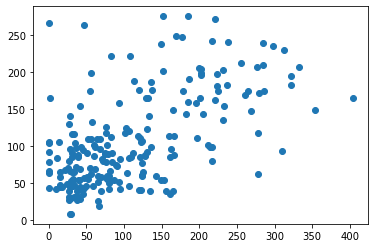

In [22]:
plt.scatter(y_test,prediction)

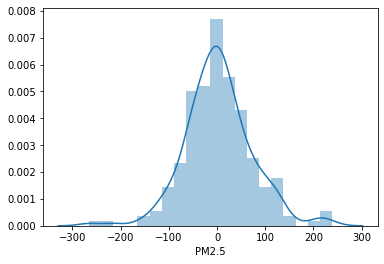

In [23]:
sns.distplot(y_test-prediction)

#### Cross Validation

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
xgb1= xgb.XGBRegressor()

In [75]:
score= cross_val_score(xgb1,x,y,scoring= 'neg_mean_squared_error', cv=5, n_jobs=-1)

In [76]:
score.mean()

-5844.643225214421

In [77]:
###Not that good result

#### Hyperparameter tuning using RSCV

In [25]:
xgb2= xgb.XGBRegressor()

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
n_iter= [int(x) for x in np.linspace(50,100,10)]
learning_rate= ['0.1', '0.3', '0.5', '0.7', '0.9']
max_depth = [int(x) for x in np.linspace(10,100,10)]
subsample=[0.6,0.7,0.8]
min_child_weight=[3,4,5,6,7]

In [54]:
params= {'learning_rate': learning_rate, 'max_depth': max_depth, 
            'subsample': subsample, 'min_child_weight':min_child_weight}

In [57]:
Rand_grid= RandomizedSearchCV(xgb2,param_distributions= params,n_jobs=-1, n_iter= 50, cv=5, verbose=3, scoring='neg_mean_squared_error', random_state=42)

In [58]:
Rand_grid.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   26.4s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                          tree_met

In [59]:
Rand_grid.best_params_

{'subsample': 0.7,
 'min_child_weight': 7,
 'max_depth': 90,
 'learning_rate': '0.1'}

In [61]:
Rand_grid.best_score_

-4712.940456613118

In [64]:
xgb2=xgb.XGBRegressor(subsample= 0.7,
 min_child_weight= 7,
 max_depth= 90,
 learning_rate= 0.1)

In [65]:
xgb2.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=90,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
xgb2.score(x_train,y_train)

0.957225970121377

In [67]:
xgb2.score(x_test,y_test)

0.3519016814627739

In [68]:
prediction= xgb2.predict(x_test)

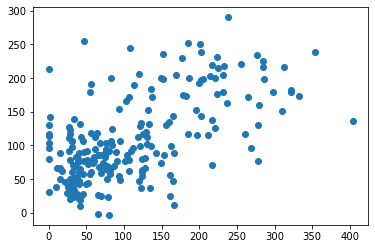

In [69]:
plt.scatter(y_test,prediction)

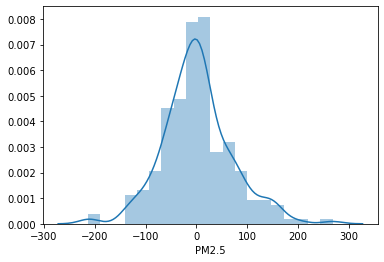

In [71]:
sns.distplot(y_test-prediction)

#### Metrics calculations

In [78]:
from sklearn import metrics

In [80]:
metrics.mean_absolute_error(y_test, prediction)

50.59812678895205

In [81]:
metrics.mean_squared_error(y_test,prediction)

4716.746638012706

In [82]:
np.sqrt(metrics.mean_absolute_error(y_test, prediction))

7.113236027923722

#### Save the model

In [83]:
import pickle

In [84]:
file= open('XGboost.pkl', 'wb')

In [85]:
pickle.dump(xgb2,file)